In [1]:
print("Hello World")

Hello World


In [2]:
# Install required packages
# %%capture --no-stderr
# %pip install langchain_community langchain_groq

# Import basic libraries
import os
import getpass
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults

# Set up API keys
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")

_set_if_undefined("GROQ_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

In [3]:
# Part 2: Set up the LLM and Search Tool
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool

# Initialize Groq
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.1
)



In [6]:
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.1
)

# Create search tool
search = TavilySearchResults(max_results=3)
tools = [
    Tool(
        name="Search",
        func=search.invoke,
        description="Useful for searching information on the internet"
    )
]

In [7]:
search.invoke("What are the major technological breakthroughs in 2023?")

[{'url': 'https://www.livescience.com/technology/the-biggest-technology-breakthroughs-of-2023',
  'content': '16 tech projects from 2023 that could change the world\nGet into the Apple ecosystem for under $250 with this after-Christmas iPad deal\nParadoxical frog: The giant tadpole that turns into a little frog\nBy Jamie CarterDecember 28, 2023\n IBM\'s new Heron chip inches us closer to a quantum reality\nI remain unconvinced by the "metaverse", but Meta\'s insistence on pushing us into its digital world (where, until recently, we didn\'t have legs) touches on a much wider trend. The biggest technology breakthroughs of 2023\n2023 was a breakout year for artificial intelligence, quantum computing and augmented reality.\n The launch coincided with the release of a 133-qubit quantum chip, dubbed "Heron" — which experts are way more excited about than the 1,000-qubit chip it released at the same time. Regardless of the area, Live Science will be at the forefront — covering the biggest tec

In [8]:
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

In [10]:
# Part 3: Create the Agent
# Define the prompt template correctly
prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful research assistant. 
    Your goal is to provide accurate information by searching the internet.
    Always cite your sources at the end of your response.
    
    You have access to the following tools: {tools}
    
    Available tool names: {tool_names}"""),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad"),
])

# Create the agent
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


In [11]:
# Part 4: Function to make research queries
def research_topic(query: str):
    """
    Function to research any topic using the agent
    """
    try:
        result = agent_executor.invoke({"input": query})
        return result["output"]
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage
query = "What were the major technological breakthroughs in 2023?"
result = research_topic(query)
print(result)



> Entering new AgentExecutor chain...
An error occurred: "Input to ChatPromptTemplate is missing variables {'chat_history'}.  Expected: ['agent_scratchpad', 'chat_history', 'input'] Received: ['input', 'intermediate_steps', 'agent_scratchpad']\nNote: if you intended {chat_history} to be part of the string and not a variable, please escape it with double curly braces like: '{{chat_history}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "


In [12]:
# Part 2: Set up the LLM and Search Tool
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Initialize Groq
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.1
)

# Create search tool
search = TavilySearchResults(max_results=3)
tools = [
    Tool(
        name="Search",
        func=search.invoke,
        description="Useful for searching information on the internet"
    )
]


# Part 3: Create the Agent
# Define the prompt template correctly
prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful research assistant. 
    Your goal is to provide accurate information by searching the internet.
    Always cite your sources at the end of your response.
    
    You have access to the following tools: {tools}
    
    Available tool names: {tool_names}"""),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad"),
])

# Create the agent
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Part 4: Function to make research queries
def research_topic(query: str):
    """
    Function to research any topic using the agent
    """
    try:
        result = agent_executor.invoke({"input": query})
        return result["output"]
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage
query = "What were the major technological breakthroughs in 2023?"
result = research_topic(query)
print(result)



> Entering new AgentExecutor chain...
An error occurred: variable agent_scratchpad should be a list of base messages, got  of type <class 'str'>


In [14]:
# Import required libraries
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langchain.prompts import PromptTemplate
import os
import getpass

# Set up API keys
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")

_set_if_undefined("GROQ_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

# Initialize Groq
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.1
)

# Create search tool
search = TavilySearchResults(max_results=3)
tools = [
    Tool(
        name="Search",
        func=search.invoke,
        description="Useful for searching information on the internet"
    )
]

# Define the prompt template
template = """Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
{agent_scratchpad}"""

prompt = PromptTemplate.from_template(template)

# Create the agent
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Function to make research queries
def research_topic(query: str):
    """
    Function to research any topic using the agent
    """
    try:
        result = agent_executor.invoke({"input": query})
        return result["output"]
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage
if __name__ == "__main__":
    # Try some example queries
    queries = [
        "what is previous query"
    ]
    
    for query in queries:
        print(f"\nResearching: {query}")
        print("-" * 50)
        result = research_topic(query)
        print(result)
        print("-" * 50)


Researching: what is previous query
--------------------------------------------------


> Entering new AgentExecutor chain...
Thought: The user is asking about the previous query. However, as a standalone tool, I don't have the ability to track previous queries. I would need to be integrated into a larger system to have this capability. For now, I can only perform searches based on the input provided.

Final Answer: I'm sorry for the confusion, but as a standalone tool, I don't have the ability to track previous queries. I can help you perform a new search if you'd like.

> Finished chain.
I'm sorry for the confusion, but as a standalone tool, I don't have the ability to track previous queries. I can help you perform a new search if you'd like.
--------------------------------------------------


In [15]:
# Previous imports plus new ones for graph visualization
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langchain.prompts import PromptTemplate
from langgraph.graph import StateGraph, END, START
from langgraph.graph import MessagesState
from langgraph.types import Command
from typing import Literal
from langchain_core.messages import HumanMessage
import os
import getpass
from IPython.display import Image, display

# [Previous API key setup and tool definition code remains the same]

# Define the research node
def research_node(state: MessagesState) -> Command[Literal["END"]]:
    # Get the last message
    message = state.messages[-1].content
    
    # Use the agent to process the message
    result = agent_executor.invoke({"input": message})
    
    # Wrap the result in a HumanMessage
    response = HumanMessage(content=result["output"], name="researcher")
    
    # Return command to end the graph
    return Command(
        update={"messages": state.messages + [response]},
        goto="END"
    )

# Create the graph
workflow = StateGraph(MessagesState)

# Add the research node
workflow.add_node("researcher", research_node)

# Add edges
workflow.add_edge(START, "researcher")
workflow.add_edge("researcher", END)

# Compile the graph
graph = workflow.compile()

# Visualize the graph
try:
    # Generate and display the graph visualization
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not generate graph visualization: {e}")

# Function to run the graph
def research_with_graph(query: str):
    """
    Function to research using the graph workflow
    """
    events = graph.stream({
        "messages": [HumanMessage(content=query)]
    })
    
    # Process and print each step
    for event in events:
        print("\nStep Output:")
        print("-" * 50)
        if "messages" in event:
            for message in event["messages"]:
                print(f"{message.name}: {message.content}")
        print("-" * 50)

# Example usage
if __name__ == "__main__":
    query = "What were the major technological breakthroughs in 2023?"
    print(f"\nResearching: {query}")
    research_with_graph(query)

ValueError: Found edge ending at unknown node `END`

In [20]:
# Install required packages if needed
# !pip install langchain-groq langchain-community langgraph graphviz

# Imports
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langchain.prompts import PromptTemplate
from langgraph.graph import StateGraph
from typing import Dict, TypedDict
from IPython.display import Image, display
import os
import getpass

# Set up API keys
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")

_set_if_undefined("GROQ_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

In [21]:
# Initialize Groq
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0.1
)

# Create search tool
search = TavilySearchResults(max_results=3)
tools = [
    Tool(
        name="Search",
        func=search.invoke,
        description="Useful for searching information on the internet"
    )
]

# Define the prompt template
template = """Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
{agent_scratchpad}"""

prompt = PromptTemplate.from_template(template)

In [18]:
prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\n{agent_scratchpad}')

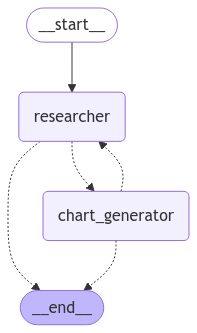

In [25]:
# Create the agents
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Define state schema
class AgentState(TypedDict):
    input: str
    output: str
    chart_needed: bool

# Create the graph with state schema
workflow = StateGraph(AgentState)

# Add the nodes
def research_node(state: AgentState) -> AgentState:
    result = agent_executor.invoke({"input": state["input"]})
    # Check if chart is needed based on the result
    needs_chart = "chart" in result["output"].lower() or "graph" in result["output"].lower()
    return {
        "input": state["input"],
        "output": result["output"],
        "chart_needed": needs_chart
    }

def chart_generator_node(state: AgentState) -> AgentState:
    chart_prompt = f"Generate a chart based on this data: {state['output']}"
    result = agent_executor.invoke({"input": chart_prompt})
    # Check if more research is needed
    needs_more_research = "need more data" in result["output"].lower()
    return {
        "input": state["input"],
        "output": result["output"],
        "chart_needed": needs_more_research
    }

# Add nodes
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_generator_node)

# Add edges with conditions
workflow.set_entry_point("researcher")

# Add conditional edges
workflow.add_conditional_edges(
    "researcher",
    lambda x: "chart_generator" if x["chart_needed"] else "end"
)

workflow.add_conditional_edges(
    "chart_generator",
    lambda x: "researcher" if x["chart_needed"] else "end"
)

# Compile the graph
graph = workflow.compile()

# Visualize the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not generate graph visualization: {e}")
    pass

In [26]:
def research_topic(query: str):
    """
    Function to research a topic with potential chart generation
    """
    try:
        result = graph.invoke({
            "input": query,
            "output": "",
            "chart_needed": False
        })
        return result["output"]
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage
query = "Create a chart showing the global temperature changes over the last 10 years"
print(f"\nResearching: {query}")
print("-" * 50)
result = research_topic(query)
print(result)


Researching: Create a chart showing the global temperature changes over the last 10 years
--------------------------------------------------


> Entering new AgentExecutor chain...
Thought: To answer this question, I need to find data on global temperature changes over the last 10 years. I can use the Search tool for this.

Action: Search
Action Input: 'Global temperature changes over the last 10 years'
[{'url': 'https://www.wri.org/insights/6-ways-climate-changed-over-past-decade', 'content': "There were some important bright spots for climate over the past 10 years. At the start of the decade, projections by the International Energy Agency (IEA) suggested that world's emissions trajectory put it on course for a catastrophic 6˚C of warming by the end of the century, significantly higher than the 1.5-2 degrees C (2.7-3.6 degrees F"}, {'url': 'https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature', 'content': "According to NOAA's\xa02021 Annual C

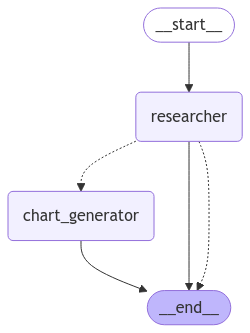

In [28]:
# Create the agents
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Define state schema
class AgentState(TypedDict):
    input: str
    output: str
    needs_chart: bool

# Create the graph with state schema
workflow = StateGraph(AgentState)

# Add the nodes
def research_node(state: AgentState) -> dict:
    result = agent_executor.invoke({"input": state["input"]})
    # Check if we need a chart
    needs_chart = "chart" in state["input"].lower() or "graph" in state["input"].lower()
    return {
        "input": state["input"],
        "output": result["output"],
        "needs_chart": needs_chart
    }

def chart_node(state: AgentState) -> dict:
    chart_prompt = f"Create a visualization for this data: {state['output']}"
    result = agent_executor.invoke({"input": chart_prompt})
    return {
        "input": state["input"],
        "output": state["output"] + "\n" + result["output"],
        "needs_chart": False
    }

# Add nodes to workflow
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

# Define conditional edges
def router(state: AgentState) -> str:
    if state["needs_chart"]:
        return "chart_generator"
    return "finish"

# Add edges
workflow.set_entry_point("researcher")
workflow.add_conditional_edges(
    "researcher",
    router
)
workflow.set_finish_point("chart_generator")
workflow.set_finish_point("researcher")

# Compile the graph
graph = workflow.compile()

# Visualize the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not generate graph visualization: {e}")

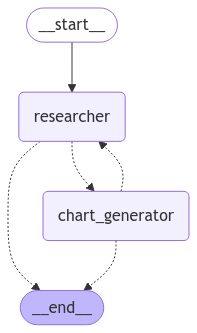


Researching: Create a chart showing the global temperature changes over the last 10 years
--------------------------------------------------


> Entering new AgentExecutor chain...
Thought: To answer this question, I need to find data on global temperature changes over the last 10 years. I can use the Search tool for this.

Action: Search
Action Input: 'Global temperature changes over the last 10 years'
[{'url': 'https://www.wri.org/insights/6-ways-climate-changed-over-past-decade', 'content': "There were some important bright spots for climate over the past 10 years. At the start of the decade, projections by the International Energy Agency (IEA) suggested that world's emissions trajectory put it on course for a catastrophic 6˚C of warming by the end of the century, significantly higher than the 1.5-2 degrees C (2.7-3.6 degrees F"}, {'url': 'https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature', 'content': "According to NOAA's\xa02021 Annual C

In [32]:
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.tools import Tool
from langgraph.graph import StateGraph, END
from typing import TypedDict, Union, Literal

# Define state schema
class AgentState(TypedDict):
    input: str
    output: str
    needs_chart: bool
    needs_research: bool

# Create the graph with state schema
workflow = StateGraph(AgentState)

# Add the nodes
def research_node(state: AgentState) -> dict:
    result = agent_executor.invoke({"input": state["input"]})
    needs_chart = "chart" in result["output"].lower() or "graph" in result["output"].lower()
    return {
        "input": state["input"],
        "output": result["output"],
        "needs_chart": needs_chart,
        "needs_research": False
    }

def chart_node(state: AgentState) -> dict:
    chart_prompt = f"Create a visualization for this data: {state['output']}"
    result = agent_executor.invoke({"input": chart_prompt})
    needs_more_data = "need more data" in result["output"].lower()
    return {
        "input": state["input"],
        "output": result["output"],
        "needs_chart": False,
        "needs_research": needs_more_data
    }

# Add nodes to workflow
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

# Define conditional edges
def researcher_router(state: AgentState) -> Union[Literal["chart_generator"], Literal["END"]]:
    if state["needs_chart"]:
        return "chart_generator"
    return END

def chart_router(state: AgentState) -> Union[Literal["researcher"], Literal["END"]]:
    if state["needs_research"]:
        return "researcher"
    return END

# Add edges
workflow.set_entry_point("researcher")
workflow.add_conditional_edges(
    "researcher",
    researcher_router
)
workflow.add_conditional_edges(
    "chart_generator",
    chart_router
)

# Compile the graph
graph = workflow.compile()

# Visualize the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not generate graph visualization: {e}")

# Research function
def research_topic(query: str):
    """
    Function to research a topic with potential chart generation
    """
    try:
        result = graph.invoke({
            "input": query,
            "output": "",
            "needs_chart": False,
            "needs_research": False
        })
        return result["output"]
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage
query = "Create a chart showing the global temperature changes over the last 10 years"
print(f"\nResearching: {query}")
print("-" * 50)
result = research_topic(query)
print(result)